## Limpieza de Datos con Python

In [35]:
# Importando las librerías necesarias
import matplotlib.pyplot as plt # Para gráficos básicos
import seaborn as sns # Para gráficos estadísticos
import plotly.express as px # Para gráficos interactivos
import plotly.io as pio # Para guardar gráficos de Plotly
import pandas as pd # Para manipulación de datos
import numpy as np # Para operaciones numéricas
from colorama import Fore, Style # Para colores en la terminal

In [36]:
# Ruta del archivo CSV
ruta = "../data/raw/amazon.csv"
# Cargando el dataset
df = pd.read_csv(ruta)

### 1. Inspección Inicial

In [37]:
# Inspección Inicial
print(Fore.GREEN + "Inspección Inicial del Dataset:" + Style.RESET_ALL)
print(Fore.BLUE + f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas." + Style.RESET_ALL)

Inspección Inicial del Dataset:
El dataset contiene 1465 filas y 16 columnas.


In [38]:
# Primeras filas del dataset
print(Fore.GREEN + "Primeras filas del dataset: " + Fore.RESET)
df.head()

Primeras filas del dataset: 


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [39]:
# Información del DataFrame
print(Fore.GREEN + "Información del DataFrame:" + Fore.RESET)
print(Fore.BLUE)
df.info()
print(Style.RESET_ALL)

Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 n

**Interpretación:**

- Podemos concluir que no hay nulos en el dataset.
- Hay que corregir los tipos de datos (Dtypes) en algunas columnas.

In [40]:
# Estadísticas descriptivas
print(Fore.BLUE + "Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


**Interpretación:**

- Ya que todas las columnas son de tipo Object, no se puede concluir cuales son las estadísticas descriptivas generales.

### 2. Tratamiento de valores nulos

In [41]:
# Ver valores nulos
print(Fore.GREEN + "Valores nulos en el dataset:" + Fore.RESET)
print(df.isnull().sum())

Valores nulos en el dataset:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


**Interpretación:**

- No hay valores nulos en ninguna de las columnas.

### 3. Eliminación de Duplicados

In [42]:
print("Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
# Verificación de duplicados
print(Fore.GREEN + "Número de filas duplicadas en el dataset:" + Fore.RESET)
print(df.duplicated().sum()) 

Valores únicos por columna:
product_id: 1351 valores únicos
product_name: 1337 valores únicos
category: 211 valores únicos
discounted_price: 550 valores únicos
actual_price: 449 valores únicos
discount_percentage: 92 valores únicos
rating: 28 valores únicos
rating_count: 1143 valores únicos
about_product: 1293 valores únicos
user_id: 1194 valores únicos
user_name: 1194 valores únicos
review_id: 1194 valores únicos
review_title: 1194 valores únicos
review_content: 1212 valores únicos
img_link: 1412 valores únicos
product_link: 1465 valores únicos
Número de filas duplicadas en el dataset:
0


**Interpretación:**

- No hay duplicados en el dataset

### 4. Conversión de tipos de datos

In [43]:
# Revisión de tipos de datos
print(Fore.GREEN + "Tipos de datos de cada columna:" + Fore.RESET)
print(df.dtypes)

Tipos de datos de cada columna:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [44]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [45]:
# Convertir columnas a tipos adecuados

# Eliminar símbolos no numéricos de los precios
df['discounted_price'] = df['discounted_price'].str.replace(r'[^\d.]', '', regex=True)
df['actual_price'] = df['actual_price'].str.replace(r'[^\d.]', '', regex=True)

# Eliminar '%' del porcentaje
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=True)

# Eliminar comas del conteo de calificaciones
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=True)

# Eliminar valores no numéricos en 'rating' (por ejemplo: '|', 'N/A', etc.)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convertir todo a los tipos correctos (y NaN si no se puede convertir)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [46]:
# Verificar los tipos de datos después de la conversión
print(Fore.GREEN + "Tipos de datos después de la conversión:" + Fore.RESET)
print(df.dtypes)

Tipos de datos después de la conversión:
product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [47]:
df.describe() # Para ver estadisticas descriptivas después de la conversión

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


### 5. Detección y Tratamiento de Outliers

In [48]:
# Identificar columnas numéricas para detección de outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

In [53]:
# Conteo de outliers en cada columna numérica usando el método IQR
outliers_count = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
print(Fore.GREEN + "Conteo de outliers en cada columna numérica:" + Fore.RESET)
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

Conteo de outliers en cada columna numérica:
discounted_price: 217 outliers
actual_price: 213 outliers
discount_percentage: 0 outliers
rating: 74 outliers
rating_count: 141 outliers


In [55]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"\n{col} - rango aceptado: [{lower:.2f}, {upper:.2f}]")
    df[df[col] < lower][col].head()
    df[df[col] > upper][col].head()



discounted_price - rango aceptado: [-2186.00, 4510.00]

actual_price - rango aceptado: [-4442.50, 9537.50]

discount_percentage - rango aceptado: [-14.50, 109.50]

rating - rango aceptado: [3.55, 4.75]

rating_count - rango aceptado: [-23039.75, 41562.25]


In [58]:
# Evita truncar la salida
pd.set_option('display.max_rows', None)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Obtener lista de valores outliers
    outliers_list = df[(df[col] < lower) | (df[col] > upper)][col].tolist()
    
    print(f"\n📌 Outliers en '{col}' ({len(outliers_list)} valores):")
    print(outliers_list)



📌 Outliers en 'discounted_price' (217 valores):
[13999.0, 13490.0, 13490.0, 11499.0, 14999.0, 32999.0, 19999.0, 6999.0, 15999.0, 32990.0, 13999.0, 7999.0, 26999.0, 10901.0, 7299.0, 29999.0, 27999.0, 30990.0, 24999.0, 18990.0, 21999.0, 37999.0, 7390.0, 15990.0, 8499.0, 20990.0, 32999.0, 9999.0, 23999.0, 30990.0, 9999.0, 29990.0, 15490.0, 9490.0, 12499.0, 32999.0, 8990.0, 5699.0, 47990.0, 24999.0, 11990.0, 6490.0, 6999.0, 42999.0, 31999.0, 32990.0, 77990.0, 54990.0, 4699.0, 18999.0, 35999.0, 8999.0, 45999.0, 21999.0, 21990.0, 47990.0, 18999.0, 7999.0, 32990.0, 29999.0, 13990.0, 26999.0, 10990.0, 16999.0, 14999.0, 24990.0, 61999.0, 24499.0, 10499.0, 46999.0, 6499.0, 28999.0, 28999.0, 6499.0, 6499.0, 9499.0, 8999.0, 9499.0, 18499.0, 12999.0, 16999.0, 16499.0, 8499.0, 6499.0, 8999.0, 15499.0, 8999.0, 12999.0, 15490.0, 19999.0, 28999.0, 13999.0, 13999.0, 4790.0, 33999.0, 10999.0, 34999.0, 16999.0, 10999.0, 13999.0, 12999.0, 20999.0, 15499.0, 15499.0, 22999.0, 7499.0, 13999.0, 12999.0, 15490

In [49]:
# boxplot para detectar outliers en cada columna numérica usando plotly

for col in numeric_cols:
    fig = px.box(
        df, 
        y=col, 
        title=f'📦 Boxplot de {col}',
        points="all",  # Muestra todos los puntos (outliers incluidos)
        template="plotly_white",  # Fondo claro y limpio
        color_discrete_sequence=["#800000"]  # Color vino tinto profesional
    )
    
    fig.update_layout(
        title_font=dict(size=20, family='Arial', color='black'),
        yaxis_title=col,
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        margin=dict(l=50, r=30, t=50, b=30),
        height=400
    )
    
    fig.update_traces(jitter=0.3, marker=dict(size=5, opacity=0.6))
    fig.show() 

In [50]:
# Guardar los gráficos de boxplot como archivos HTML para visualización interactiva
for col in numeric_cols:
    fig = px.box(
        df, 
        y=col, 
        title=f'📦 Boxplot de {col}',
        points="all",
        template="plotly_white",
        color_discrete_sequence=["#800000"]
    )
    
    fig.update_layout(
        title_font=dict(size=20, family='Arial', color='black'),
        yaxis_title=col,
        margin=dict(l=50, r=30, t=50, b=30),
        height=400
    )
    
    fig.write_html(f"../src/html/boxplot_{col}.html")

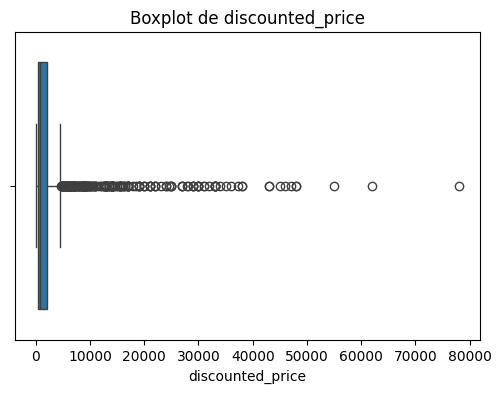

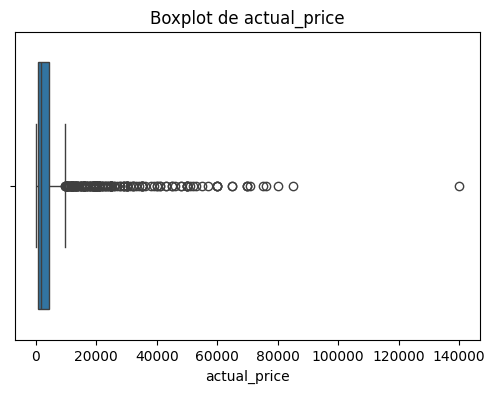

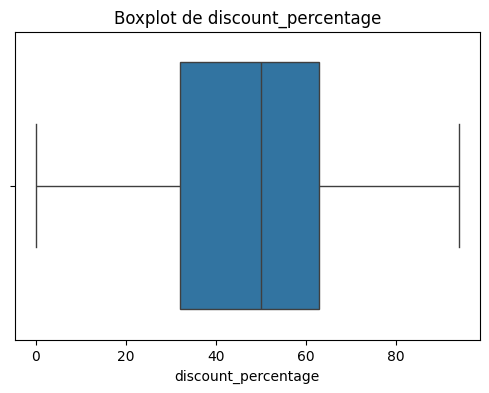

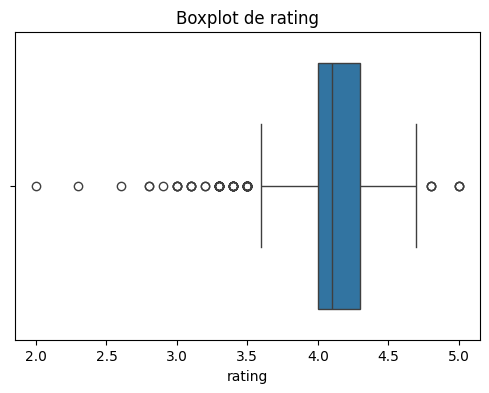

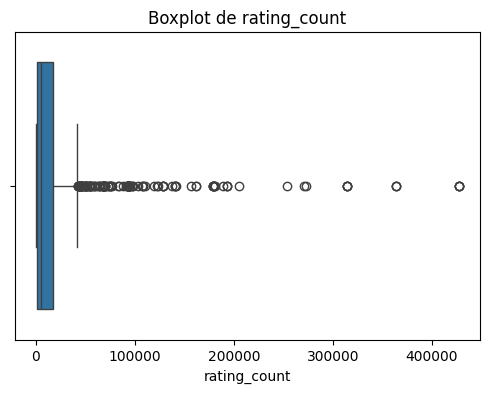

In [52]:
# Boxplots con seaborn para detectar outliers en cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()